In [3]:
from __future__ import division

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
#import mltools as ml
import time


np.random.seed(0)
%matplotlib inline

In [4]:
X = np.genfromtxt('data/X_train.txt', delimiter=None)
Y = np.genfromtxt('data/Y_train.txt', delimiter=None)
X = shuffle(X)
Y = shuffle(Y)

In [5]:
for f in range(X.shape[1]):
    print "Feature #{:3d}".format(f+1)
    print "    min:      {}".format(min(X[:,f]))
    print "    max:      {}".format(max(X[:,f]))
    print "    mean:     {}".format(np.mean(X[:,f]))
    print "    variance: {}".format(np.var(X[:,f]))

Feature #  1
    min:      193.5
    max:      253.0
    mean:     241.6011037
    variance: 83.4991711498
Feature #  2
    min:      152.5
    max:      249.0
    mean:     227.3765713
    variance: 92.625593125
Feature #  3
    min:      214.25
    max:      252.5
    mean:     241.5541505
    variance: 35.2863398033
Feature #  4
    min:      152.5
    max:      252.5
    mean:     232.82676815
    variance: 97.6257317486
Feature #  5
    min:      10.0
    max:      31048.0
    mean:     3089.923365
    variance: 15651513.7564
Feature #  6
    min:      0.0
    max:      13630.0
    mean:     928.25902
    variance: 3081761.81695
Feature #  7
    min:      0.0
    max:      9238.0
    mean:     138.09383
    variance: 443951.746446
Feature #  8
    min:      0.0
    max:      125.17
    mean:     3.2485793303
    variance: 8.21948502491
Feature #  9
    min:      0.87589
    max:      19.167
    mean:     6.49865290275
    variance: 6.40504819136
Feature # 10
    min:      0.0
    

so yeah this is just the reading input part done...

In [6]:
X_train = pd.read_csv('data/X_train.txt', sep= " ",header = None)
Y_train = pd.read_csv('data/Y_train.txt', sep= " ",header = None)
X_test = pd.read_csv('data/X_test.txt', sep= " ",header = None)


In [7]:
from sklearn import preprocessing
X_train = preprocessing.scale(X_train)
X_train = pd.DataFrame(X_train)

X_train[13]

X_train = X_train.drop([13],axis=1)
X_test = X_test.drop([13],axis=1)
train = X_train.copy(True)
train = pd.DataFrame(train)
train["result"] = Y_train
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,result
0,0.043653,-0.039127,-0.106755,-0.039144,-0.478976,-0.384655,-0.207256,-0.691142,-0.033923,-0.052774,-0.119744,-0.237734,-0.194767,0
1,0.809703,0.272586,0.127242,0.086354,-0.381913,-0.390351,-0.207256,2.244367,-0.164474,-0.431206,-0.375943,-0.438432,-0.129102,1
2,-2.035624,-3.364073,-2.342359,-2.875012,-0.519671,-0.185281,0.270009,-0.599930,4.492753,5.329571,0.739231,1.368926,-0.182373,1
3,-0.831832,-0.662555,-0.889553,-0.313420,1.169323,1.696810,-0.207256,-0.922205,0.612864,0.646498,-0.857373,-0.753707,-0.440006,1
4,-0.831832,0.584300,0.665942,0.128862,-0.643275,-0.516811,-0.207256,1.220357,-0.487491,-0.588582,0.863200,1.047513,-0.354382,0


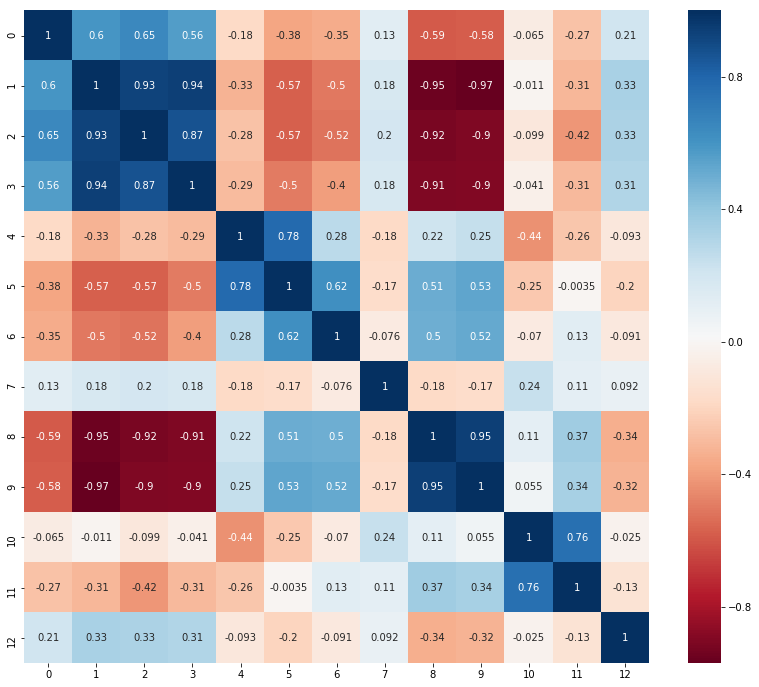

In [8]:
import seaborn as sns
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
#plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.astype(float).corr(),cmap=colormap, annot=True)

In [9]:
#plt.figure(figsize=(14,20))
#g = sns.pairplot(train, hue="result",palette = 'seismic',size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
#g.set(xticklabels=[])

### KNN


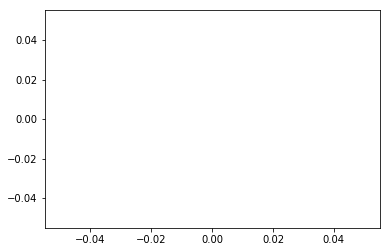

0.77532


In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
import time
Y_train = np.array(Y_train)
Y_train = Y_train.ravel()
f,ax = plt.subplots(1,1)
ids = range(0,X_test.shape[0])
xs = []
ys = []
'''
for i in range(3, 50,5):
    print("Neighbhors:",i)
    knn = KNeighborsClassifier(n_neighbors=i, p=2,n_jobs=-1)
    knn.fit(X_train,Y_train)
    cv = ShuffleSplit(n_splits=4,random_state=0)
    scores = cross_val_score(knn, X_train, Y_train, cv=cv).mean()
    xs.append(i)
    ys.append(scores)
    print("Scores:",scores)
'''
ax.plot(xs,ys)
plt.show()
knn = KNeighborsClassifier(n_neighbors=8, p=2,n_jobs=-1)

knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)
print(knn.score(X_train,Y_train))


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

'''
for i in range(7, 32,1):
    print("Depth:",i)
    random_forest = RandomForestClassifier(max_depth = i)
    random_forest.fit(X_train,Y_train)
    cv = ShuffleSplit(n_splits=4,random_state=0)
    scores = cross_val_score(random_forest, X_train, Y_train, cv=cv)
    
    print("Scores:",scores)
'''
'''
submission = pd.DataFrame({ 'ID': list(id),
                            'Prob1': Y_pred1 })
submission.to_csv("submission3.csv",index=False)
'''
random_forest = RandomForestClassifier(max_depth = 23)
random_forest.fit(X_train,Y_train)
Y_pred1 = random_forest.predict(X_test)
random_forest.score(X_train,Y_train)


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
start_time = time.time()
lr = LogisticRegression(max_iter = 200)
lr.fit(X_train,Y_train)
print("--- %s seconds ---" % (round(time.time() - start_time,2)))
print(lr.score(X_train,Y_train))
y_pred2 = lr.predict(X_test)
'''
submission = pd.DataFrame({ 'ID': list(ids),
                            'Prob1': y_pred2 })
submission.to_csv("submission4.csv",index=False)'''

In [ ]:
print('a')